## Relationship between the use of social networks and distrust of the media among young Mexicans.

By: **Xunaxhi Monserrat Pineda Rasgado.**

### Data Description
The data were obtained through a survey of university students in which they were presented with a list of media, both traditional and digital, and by means of a Lickert-type scale they were asked to indicate the respective level of use, as well as in which they placed greater trust or distrust. The design of the questionnaire took into account previous studies on the subject. The survey was applied through the Google Forms platform, so the responses were obtained electronically. Likewise, they were applied between March 30 and June 27, 2018, an electoral period, according to Mexican electoral legislation.

### Introduction

The relationship between trust and media consumption has been a continuously studied topic in communication sciences. There are several studies that indicate that the greater the trust in a given medium, the greater the consumption (Gainous et al. 2019). However, due to the consolidation of digital media and specifically of social networks as the main sources of information among young people, the question of whether trust in these media affects their consumption arises again.
The main objective is to analyze the relationship between consumption variables and trust in the media based on the analysis of data from a survey instrument applied to young university students. It also aims to describe the patterns of consumption and trust, specifically observing the relationship between the level of consumption of digital media and the degree of trust or distrust in them. To this end, a hypothesis test was performed using the Mann-Whitney U statistic.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstest
import pingouin as pg
import os

In [28]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
file_path = os.path.join(parent_directory, 'data', 'BasedeDatosMexico2018.sav')
df = pd.read_spss(file_path)

In [29]:
df.shape

(1239, 96)

# Data Cleaning

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 96 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   edo          1239 non-null   category
 1   mun          1239 non-null   category
 2   uni          1239 non-null   category
 3   tipo1        1239 non-null   category
 4   tipo2        1239 non-null   category
 5   sexo         1239 non-null   category
 6   carr         1239 non-null   category
 7   sem          1239 non-null   category
 8   año          1239 non-null   category
 9   liba         1239 non-null   category
 10  libd         1239 non-null   category
 11  int_acc      1239 non-null   category
 12  voto         1239 non-null   category
 13  con_res      1239 non-null   category
 14  int_1        1238 non-null   float64 
 15  int_2        1238 non-null   float64 
 16  int_3        1238 non-null   float64 
 17  int_4        1234 non-null   float64 
 18  int_5        1233 non-null  

In [31]:
#borramos última fila "filter_$"
df.drop(df.columns[-1], axis=1, inplace=True)

### Missing Values

In [32]:
#buscamos valores nulos
df.isna().sum()

edo          0
mun          0
uni          0
tipo1        0
tipo2        0
            ..
cap_sol7     4
cap_sol8     1
cap_sol9     2
cap_sol10    4
cap_sol11    0
Length: 95, dtype: int64

In [33]:
df.isnull().sum()

edo          0
mun          0
uni          0
tipo1        0
tipo2        0
            ..
cap_sol7     4
cap_sol8     1
cap_sol9     2
cap_sol10    4
cap_sol11    0
Length: 95, dtype: int64

In [34]:
#buscamos valores duplicados
df.duplicated().sum()

23

In [35]:
#borramos duplicados
df.drop_duplicates()

,edo,mun,uni,tipo1,tipo2,sexo,carr,sem,año,liba,...,cap_sol2,cap_sol3,cap_sol4,cap_sol5,cap_sol6,cap_sol7,cap_sol8,cap_sol9,cap_sol10,cap_sol11
0,Oaxaca,Oaxaca de Juarez,UABJO,Pública,Pública,Hombre,Ciencias jurídicas,9º o 10º semestre,De 21 a 25 años,6 libros o más al año,...,1.0,3.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0
1,Oaxaca,Oaxaca de Juarez,URSE,Privada,Privada,Mujer,Ciencias jurídicas,9º o 10º semestre,De 26 a 30 años,6 libros o más al año,...,4.0,5.0,5.0,4.0,5.0,4.0,2.0,2.0,4.0,2.0
2,Oaxaca,Santa Catarina Juquila,UABJO,Privada,Pública,Mujer,Ciencias jurídicas,3º o 4º semestre,De 16 a 20 años,3 – 5 libros al año,...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0
3,Oaxaca,Oaxaca de Juarez,UABJO,Privada,Pública,Hombre,Ciencias jurídicas,7º u 8º semestre,De 21 a 25 años,0 – 2 libros al año,...,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0
4,Oaxaca,Nejapa de Madero,UABJO,Pública,Pública,Hombre,Ciencias sociales,5º o 6º semestre,De 21 a 25 años,0 – 2 libros al año,...,3.0,4.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,Estado de México,Toluca,UAEMex,Pública,Pública,Mujer,Ciencias sociales,7º u 8º semestre,De 21 a 25 años,3 – 5 libros al año,...,5.0,3.0,4.0,5.0,3.0,3.0,5.0,5.0,2.0,1.0
1235,Estado de México,Toluca,UAEMex,Privada,Pública,Mujer,Ciencias sociales,7º u 8º semestre,De 21 a 25 años,0 – 2 libros al año,...,4.0,5.0,5.0,5.0,4.0,3.0,3.0,3.0,3.0,2.0
1236,Estado de México,Metepec,UAEMex,Privada,Pública,Mujer,Ciencias sociales,3º o 4º semestre,De 21 a 25 años,3 – 5 libros al año,...,4.0,5.0,5.0,5.0,3.0,2.0,1.0,1.0,1.0,5.0
1237,Estado de México,Santiago Tianguistenco,UAEMex,Privada,Pública,Hombre,Ciencias sociales,7º u 8º semestre,De 21 a 25 años,0 – 2 libros al año,...,3.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0


In [36]:
#eliminamos valores nulos
df.dropna(inplace = True)

In [37]:
#identificamos cuantos valores por estado
df.edo.value_counts()

edo
Nuevo León          611
Durango             160
Sonora              105
Oaxaca               89
Estado de México     77
CDMX                 27
Puebla               21
Coahuila             15
Jalisco               7
Baja California       1
Guanajuato            1
Morelos               1
San Luis Potosí       1
Tamaulipas            1
Veracruz              1
Michoacán             0
Name: count, dtype: int64

In [38]:
### Eliminar estados excepto NL, OAX, EDO MEX y CDMX
df.drop(df[df.edo.isin(["Durango", "Sonora","Puebla","Coahuila","Jalisco", "Tamaulipas","Veracruz",
                        "Morelos","Guanajuato","Michoacán","Baja California","San Luis Potosí"])].index, inplace=True)

In [39]:
#reseteamos el index
df.reset_index(inplace = True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 95 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   edo          804 non-null    category
 1   mun          804 non-null    category
 2   uni          804 non-null    category
 3   tipo1        804 non-null    category
 4   tipo2        804 non-null    category
 5   sexo         804 non-null    category
 6   carr         804 non-null    category
 7   sem          804 non-null    category
 8   año          804 non-null    category
 9   liba         804 non-null    category
 10  libd         804 non-null    category
 11  int_acc      804 non-null    category
 12  voto         804 non-null    category
 13  con_res      804 non-null    category
 14  int_1        804 non-null    float64 
 15  int_2        804 non-null    float64 
 16  int_3        804 non-null    float64 
 17  int_4        804 non-null    float64 
 18  int_5        804 non-null    f

In [40]:
#borramos las vaiables que no nos interesa invetigar

df.drop(df.columns[14:24].tolist()+ df.columns[24:35].tolist() + df.columns[53:].tolist(), axis=1, inplace=True)

In [41]:
df.int_acc.value_counts()

int_acc
Si    785
No     19
Name: count, dtype: int64

In [42]:
#nos damos una idea del consumo de redes sociales
df.con_res.value_counts()

con_res
Más de tres horas diarias    291
Dos horas                    187
Tres horas                   155
Una hora                     104
Media hora                    40
Unos cuantos minutos          24
Nada                           3
Name: count, dtype: int64

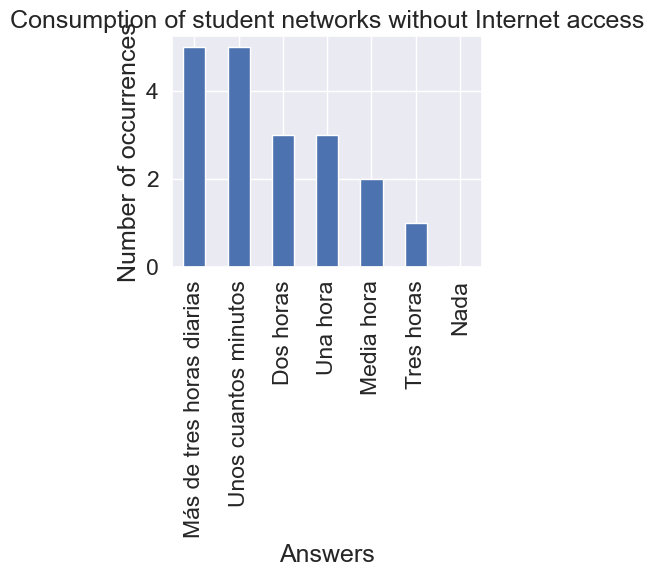

In [43]:
plt.figure(figsize=(4,3))
df.iloc[:, 13].loc[df['int_acc']=='No'].value_counts().plot(kind='bar')
plt.title('Consumption of student networks without Internet access')
plt.xlabel('Answers')
plt.ylabel('Number of occurrences')
plt.show()

**This allows us to determine to include these 19 students as part of the data to be analyzed since all of them consume social networks to some extent.**



In [44]:
df.columns

Index(['edo', 'mun', 'uni', 'tipo1', 'tipo2', 'sexo', 'carr', 'sem', 'año',
       'liba', 'libd', 'int_acc', 'voto', 'con_res', 'con_TV', 'con_pres',
       'con_pred', 'con_radio', 'con_revin', 'con_res2', 'con_blog',
       'conf_TVN', 'conf_TVP', 'conf_RN', 'conf_RP', 'conf_email', 'conf_web',
       'conf_blog', 'conf_malt', 'conf_res', 'conf_pres', 'conf_revin'],
      dtype='object')

## Data Processing

The media consumption variables were treated as ordinal variables, since a Likert-type scale was used for their measurement. On the other hand, trust variables were treated as nominal variables, since the possible responses to these measures were: (1) I trust, (2) I do not trust and (3) I do not know.

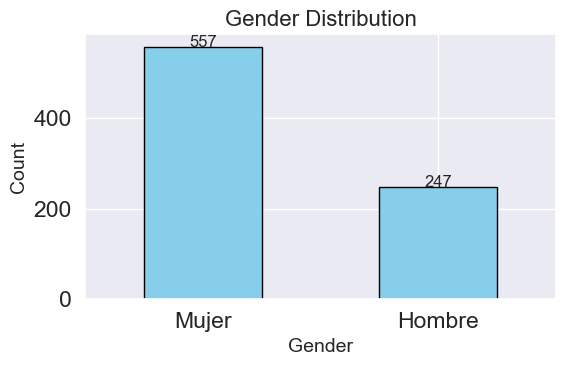

In [45]:
df_demo = pd.DataFrame(data=df, columns=['edo', 'sexo'])

plt.figure(figsize=(6, 4))

ax = df_demo['sexo'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

for i, v in enumerate(df_demo['sexo'].value_counts()):
    ax.text(i, v + 0.1, str(v), ha='center', fontsize=12)

ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Gender Distribution', fontsize=16)

plt.xticks(rotation=0)  # Rotar etiquetas del eje X
plt.tight_layout()  # Ajustar automáticamente los márgenes
plt.show()

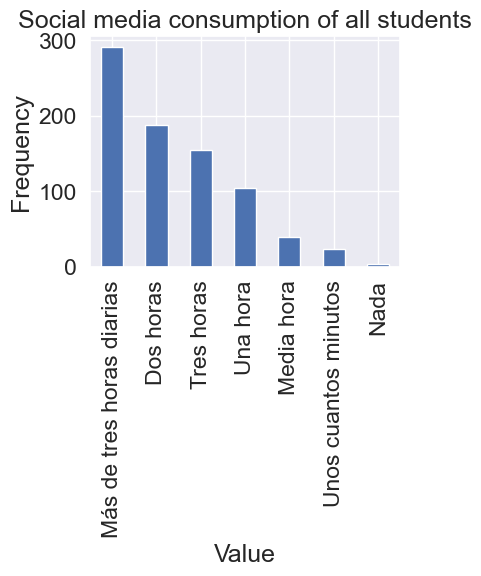

In [46]:
#variable 'horas conectado a social media'
hrs_redes_plot = plt.figure(figsize=(4,3))
df.con_res.value_counts().plot(kind='bar')
plt.title('Social media consumption of all students')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [47]:
#creamos el df de consumo de medios
df_consumo = pd.DataFrame(data=df, columns=['con_TV', 'con_pres',
       'con_pred', 'con_radio', 'con_revin', 'con_res2', 'con_blog'])
df_consumo.head()

,con_TV,con_pres,con_pred,con_radio,con_revin,con_res2,con_blog
0,Poco,Poco,Algo,Algo,Poco,Bastante,Nada
1,Poco,Poco,Algo,Poco,Algo,Algo,Poco
2,Poco,Poco,Algo,Poco,Nada,Algo,Algo
3,Poco,Poco,Poco,Nada,Poco,Poco,Poco
4,Poco,Nada,Algo,Algo,Poco,Poco,Algo


In [48]:
df_consumo.replace(to_replace =["Nada", "Poco", "Algo", "Mucho", "Bastante"],
               value=[0,1,2,3,4], inplace=True)
df_consumo.replace(to_replace=['Nada','Unos cuantos minutos','Media hora','Una hora','Dos horas', 'Tres horas', 'Más de tres horas diarias'],
                value= [0,1,2,3,4,5,6], inplace=True)

### Consumption data to ordinal variables

In [49]:
#transformamos a variables ordinales
from sklearn.preprocessing import OrdinalEncoder

OrdEnc= OrdinalEncoder()

mx_ordinales = OrdEnc.fit_transform(df_consumo)

#establecemos los headers
headers_ord=df_consumo.columns
headers_ord

df_consumo=pd.DataFrame(mx_ordinales, columns=headers_ord)

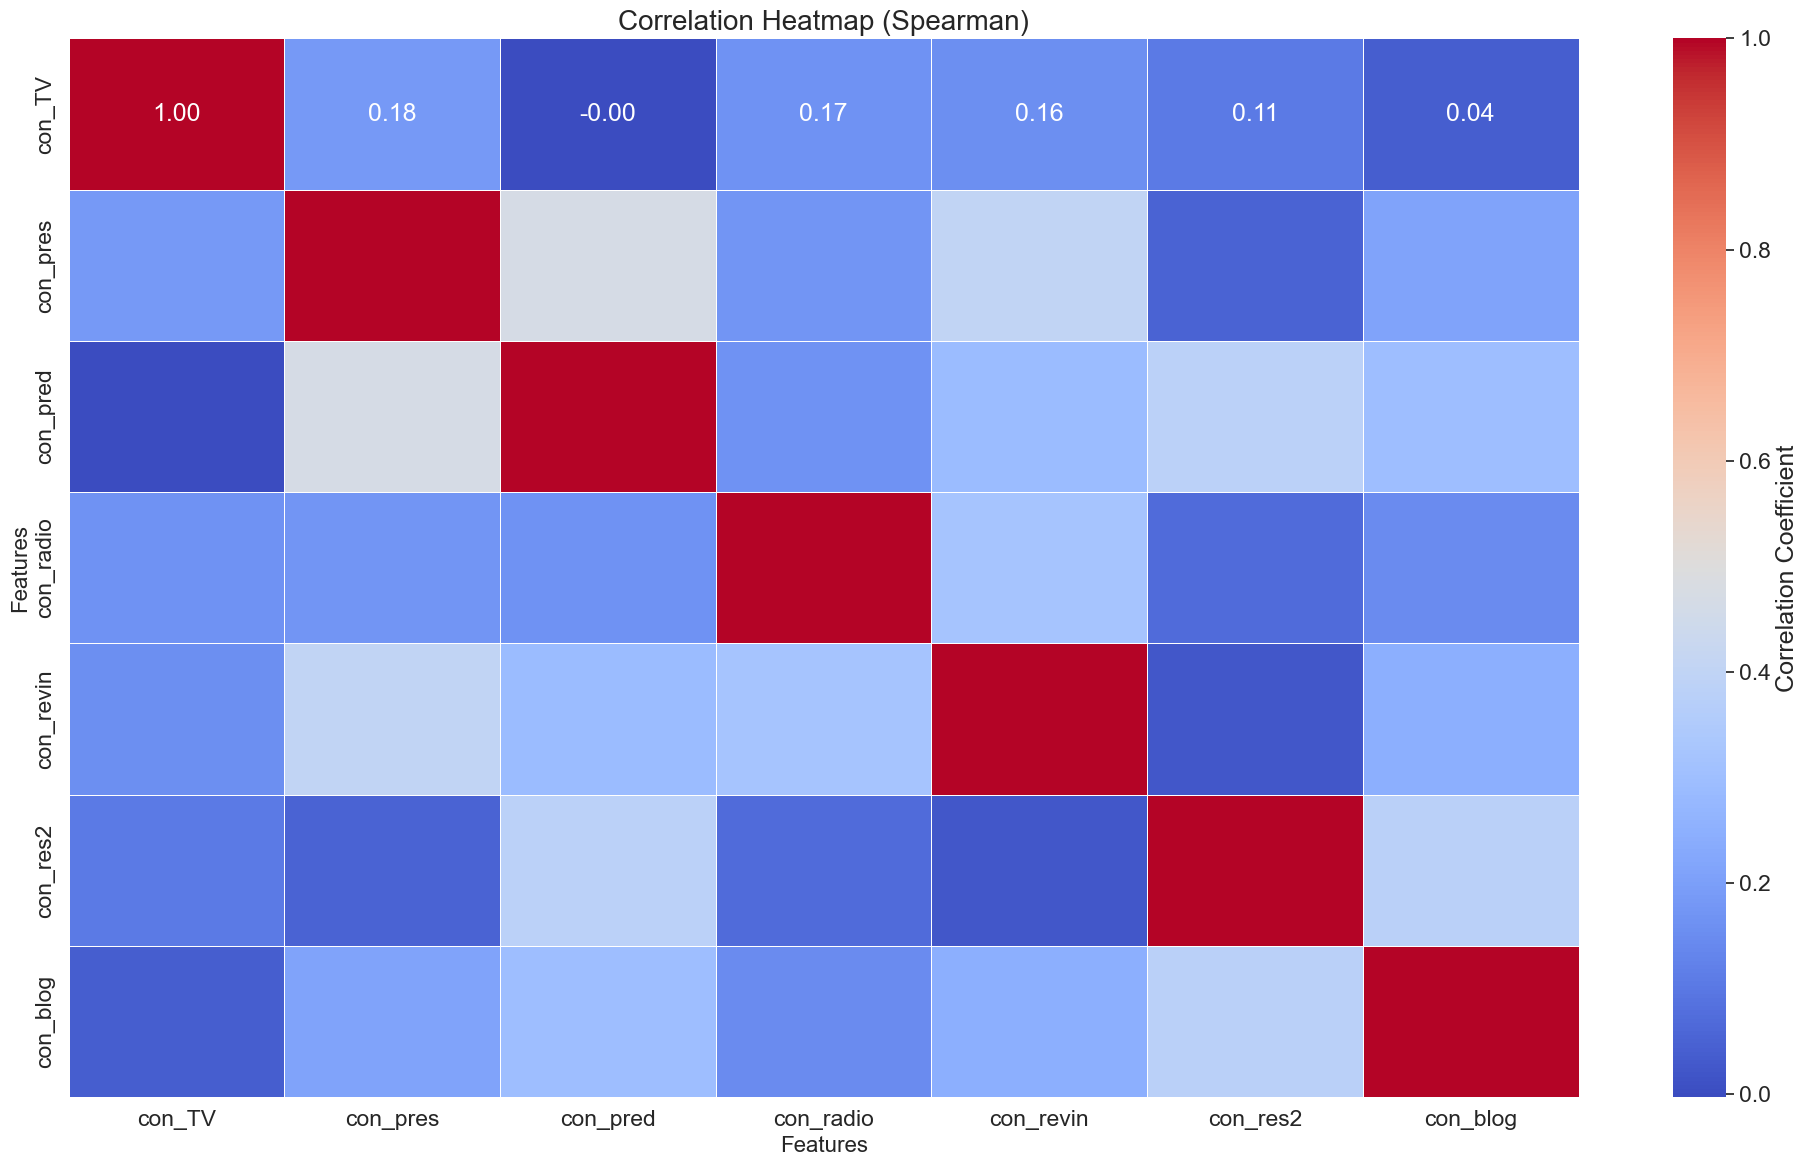

In [50]:
plt.figure(figsize=(20, 12))

sns.set(font_scale=1.5)

ax = sns.heatmap(df_consumo.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

ax.set_title('Correlation Heatmap (Spearman)', fontsize=20)
ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Features', fontsize=16)

plt.tight_layout()

# Display the plot
plt.show()


### Confidence data to nominal variables

In [51]:
df_confianza=pd.DataFrame(data=df, columns=['conf_TVN', 'conf_TVP', 'conf_RN', 'conf_RP', 'conf_email', 'conf_web',
       'conf_blog', 'conf_malt', 'conf_res', 'conf_pres', 'conf_revin'])
df_confianza.head()

,conf_TVN,conf_TVP,conf_RN,conf_RP,conf_email,conf_web,conf_blog,conf_malt,conf_res,conf_pres,conf_revin
0,No le da confianza,No le da confianza,Le da confianza,Le da confianza,Le da confianza,Le da confianza,Le da confianza,No le da confianza,Le da confianza,Le da confianza,Le da confianza
1,No le da confianza,No le da confianza,Le da confianza,Le da confianza,Le da confianza,No le da confianza,No le da confianza,No le da confianza,Le da confianza,Le da confianza,Le da confianza
2,No le da confianza,No le da confianza,No le da confianza,No le da confianza,No le da confianza,Le da confianza,Le da confianza,Le da confianza,No le da confianza,Le da confianza,No le da confianza
3,No le da confianza,No le da confianza,No le da confianza,No le da confianza,No le da confianza,No le da confianza,No le da confianza,No le da confianza,No le da confianza,No le da confianza,No le da confianza
4,No sabe,No sabe,No sabe,No sabe,No sabe,Le da confianza,Le da confianza,Le da confianza,No le da confianza,Le da confianza,No sabe


In [52]:
#confianza en redes sociales
df_confianza.conf_res.value_counts()

conf_res
No le da confianza    463
Le da confianza       180
No sabe               161
Name: count, dtype: int64

In [53]:
df_confianza.replace(to_replace =["No le da confianza", "Le da confianza", "No sabe"],
               value=[0,1,2], inplace=True)
df_confianza

,conf_TVN,conf_TVP,conf_RN,conf_RP,conf_email,conf_web,conf_blog,conf_malt,conf_res,conf_pres,conf_revin
0,0,0,1,1,1,1,1,0,1,1,1
1,0,0,1,1,1,0,0,0,1,1,1
2,0,0,0,0,0,1,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,1,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
799,1,0,1,0,0,1,1,1,0,1,0
800,0,0,0,0,0,0,1,2,0,1,2
801,1,1,1,1,0,1,0,0,0,1,1
802,0,0,1,1,0,0,0,1,0,1,1


In [54]:
#transformamos a variables nominales

from sklearn.preprocessing import LabelEncoder

lb_make=LabelEncoder()
cols=['conf_TVN', 'conf_TVP', 'conf_RN', 'conf_RP', 'conf_email', 'conf_web',
       'conf_blog', 'conf_malt', 'conf_res', 'conf_pres', 'conf_revin']

for col in cols:
    df_confianza[col+'_enc']=lb_make.fit_transform(df_confianza[col])

df_conf_nom=df_confianza[['conf_TVN_enc', 'conf_TVP_enc', 'conf_RN_enc', 'conf_RP_enc', 
                          'conf_email_enc', 'conf_web_enc','conf_blog_enc', 'conf_malt_enc',
                          'conf_res_enc', 'conf_pres_enc', 'conf_revin_enc']]
df_conf_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   conf_TVN_enc    804 non-null    int64
 1   conf_TVP_enc    804 non-null    int64
 2   conf_RN_enc     804 non-null    int64
 3   conf_RP_enc     804 non-null    int64
 4   conf_email_enc  804 non-null    int64
 5   conf_web_enc    804 non-null    int64
 6   conf_blog_enc   804 non-null    int64
 7   conf_malt_enc   804 non-null    int64
 8   conf_res_enc    804 non-null    int64
 9   conf_pres_enc   804 non-null    int64
 10  conf_revin_enc  804 non-null    int64
dtypes: int64(11)
memory usage: 69.2 KB


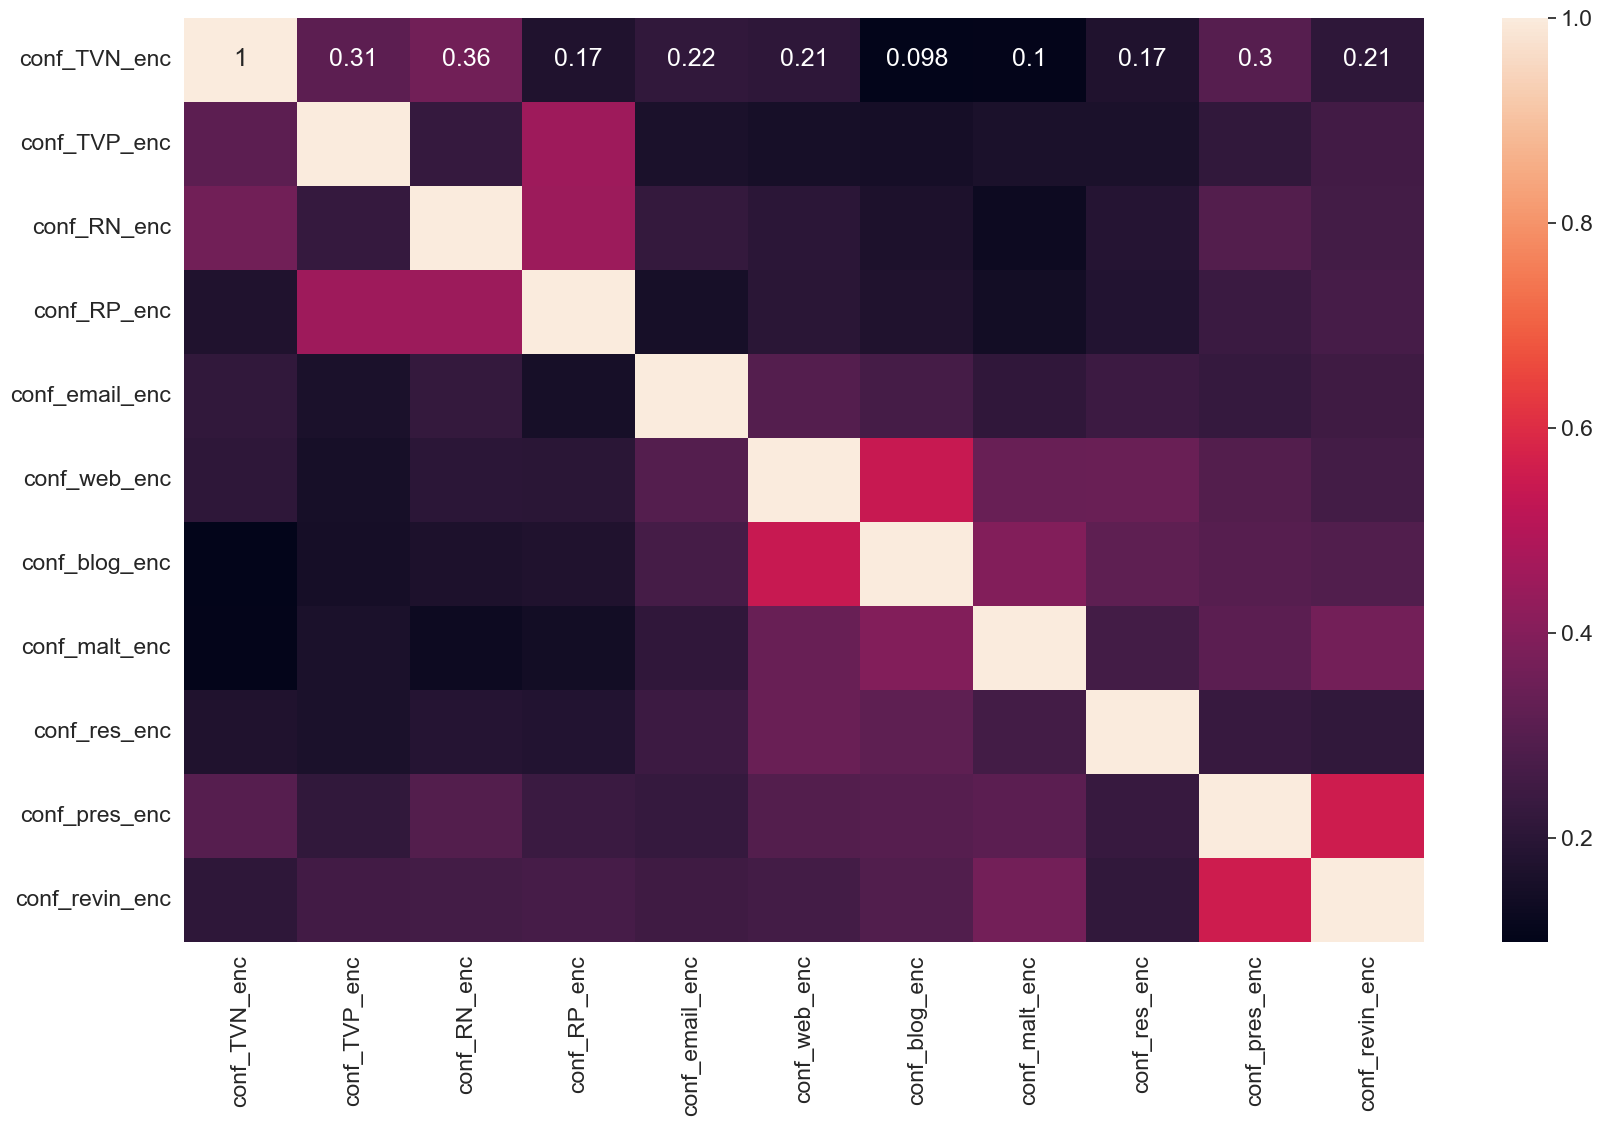

In [55]:
plt.figure(figsize=(20,12))
sns.set(font_scale = 1.5)
sns.heatmap(df_conf_nom.corr(method='spearman'), annot = True);

In [56]:
#transformamos a variables nominales
from sklearn.preprocessing import LabelEncoder
cols =['edo','sexo']

le= LabelEncoder()

df_demo[cols] = df_demo[cols].apply(LabelEncoder().fit_transform)
df_demo

,edo,sexo
0,3,1
1,3,1
2,3,0
3,3,0
4,3,0
...,...,...
799,1,1
800,1,1
801,1,1
802,1,0


## Etiquetas de df_demo

Estado de México: 1\
Nuevo León: 2\
Oaxaca: 3

Mujer: 1\
Hombre 0

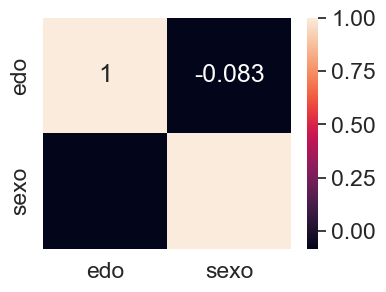

In [57]:
plt.figure(figsize=(4,3))
sns.set(font_scale = 1.5)
sns.heatmap(df_demo.corr(), annot = True);

In [58]:
df_final=pd.concat([df_demo, df_consumo, df_conf_nom ], axis=1)
df_final

,edo,sexo,con_TV,con_pres,con_pred,con_radio,con_revin,con_res2,con_blog,conf_TVN_enc,conf_TVP_enc,conf_RN_enc,conf_RP_enc,conf_email_enc,conf_web_enc,conf_blog_enc,conf_malt_enc,conf_res_enc,conf_pres_enc,conf_revin_enc
0,3,1,1.0,1.0,2.0,2.0,1.0,4.0,0.0,0,0,1,1,1,1,1,0,1,1,1
1,3,1,1.0,1.0,2.0,1.0,2.0,2.0,1.0,0,0,1,1,1,0,0,0,1,1,1
2,3,0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0,0,0,0,0,1,1,1,0,1,0
3,3,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,1.0,0.0,2.0,2.0,1.0,1.0,2.0,2,2,2,2,2,1,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,1,1,2.0,2.0,4.0,2.0,2.0,4.0,4.0,1,0,1,0,0,1,1,1,0,1,0
800,1,1,1.0,1.0,3.0,2.0,1.0,3.0,1.0,0,0,0,0,0,0,1,2,0,1,2
801,1,1,3.0,1.0,3.0,3.0,1.0,4.0,2.0,1,1,1,1,0,1,0,0,0,1,1
802,1,0,1.0,1.0,2.0,3.0,1.0,2.0,3.0,0,0,1,1,0,0,0,1,0,1,1


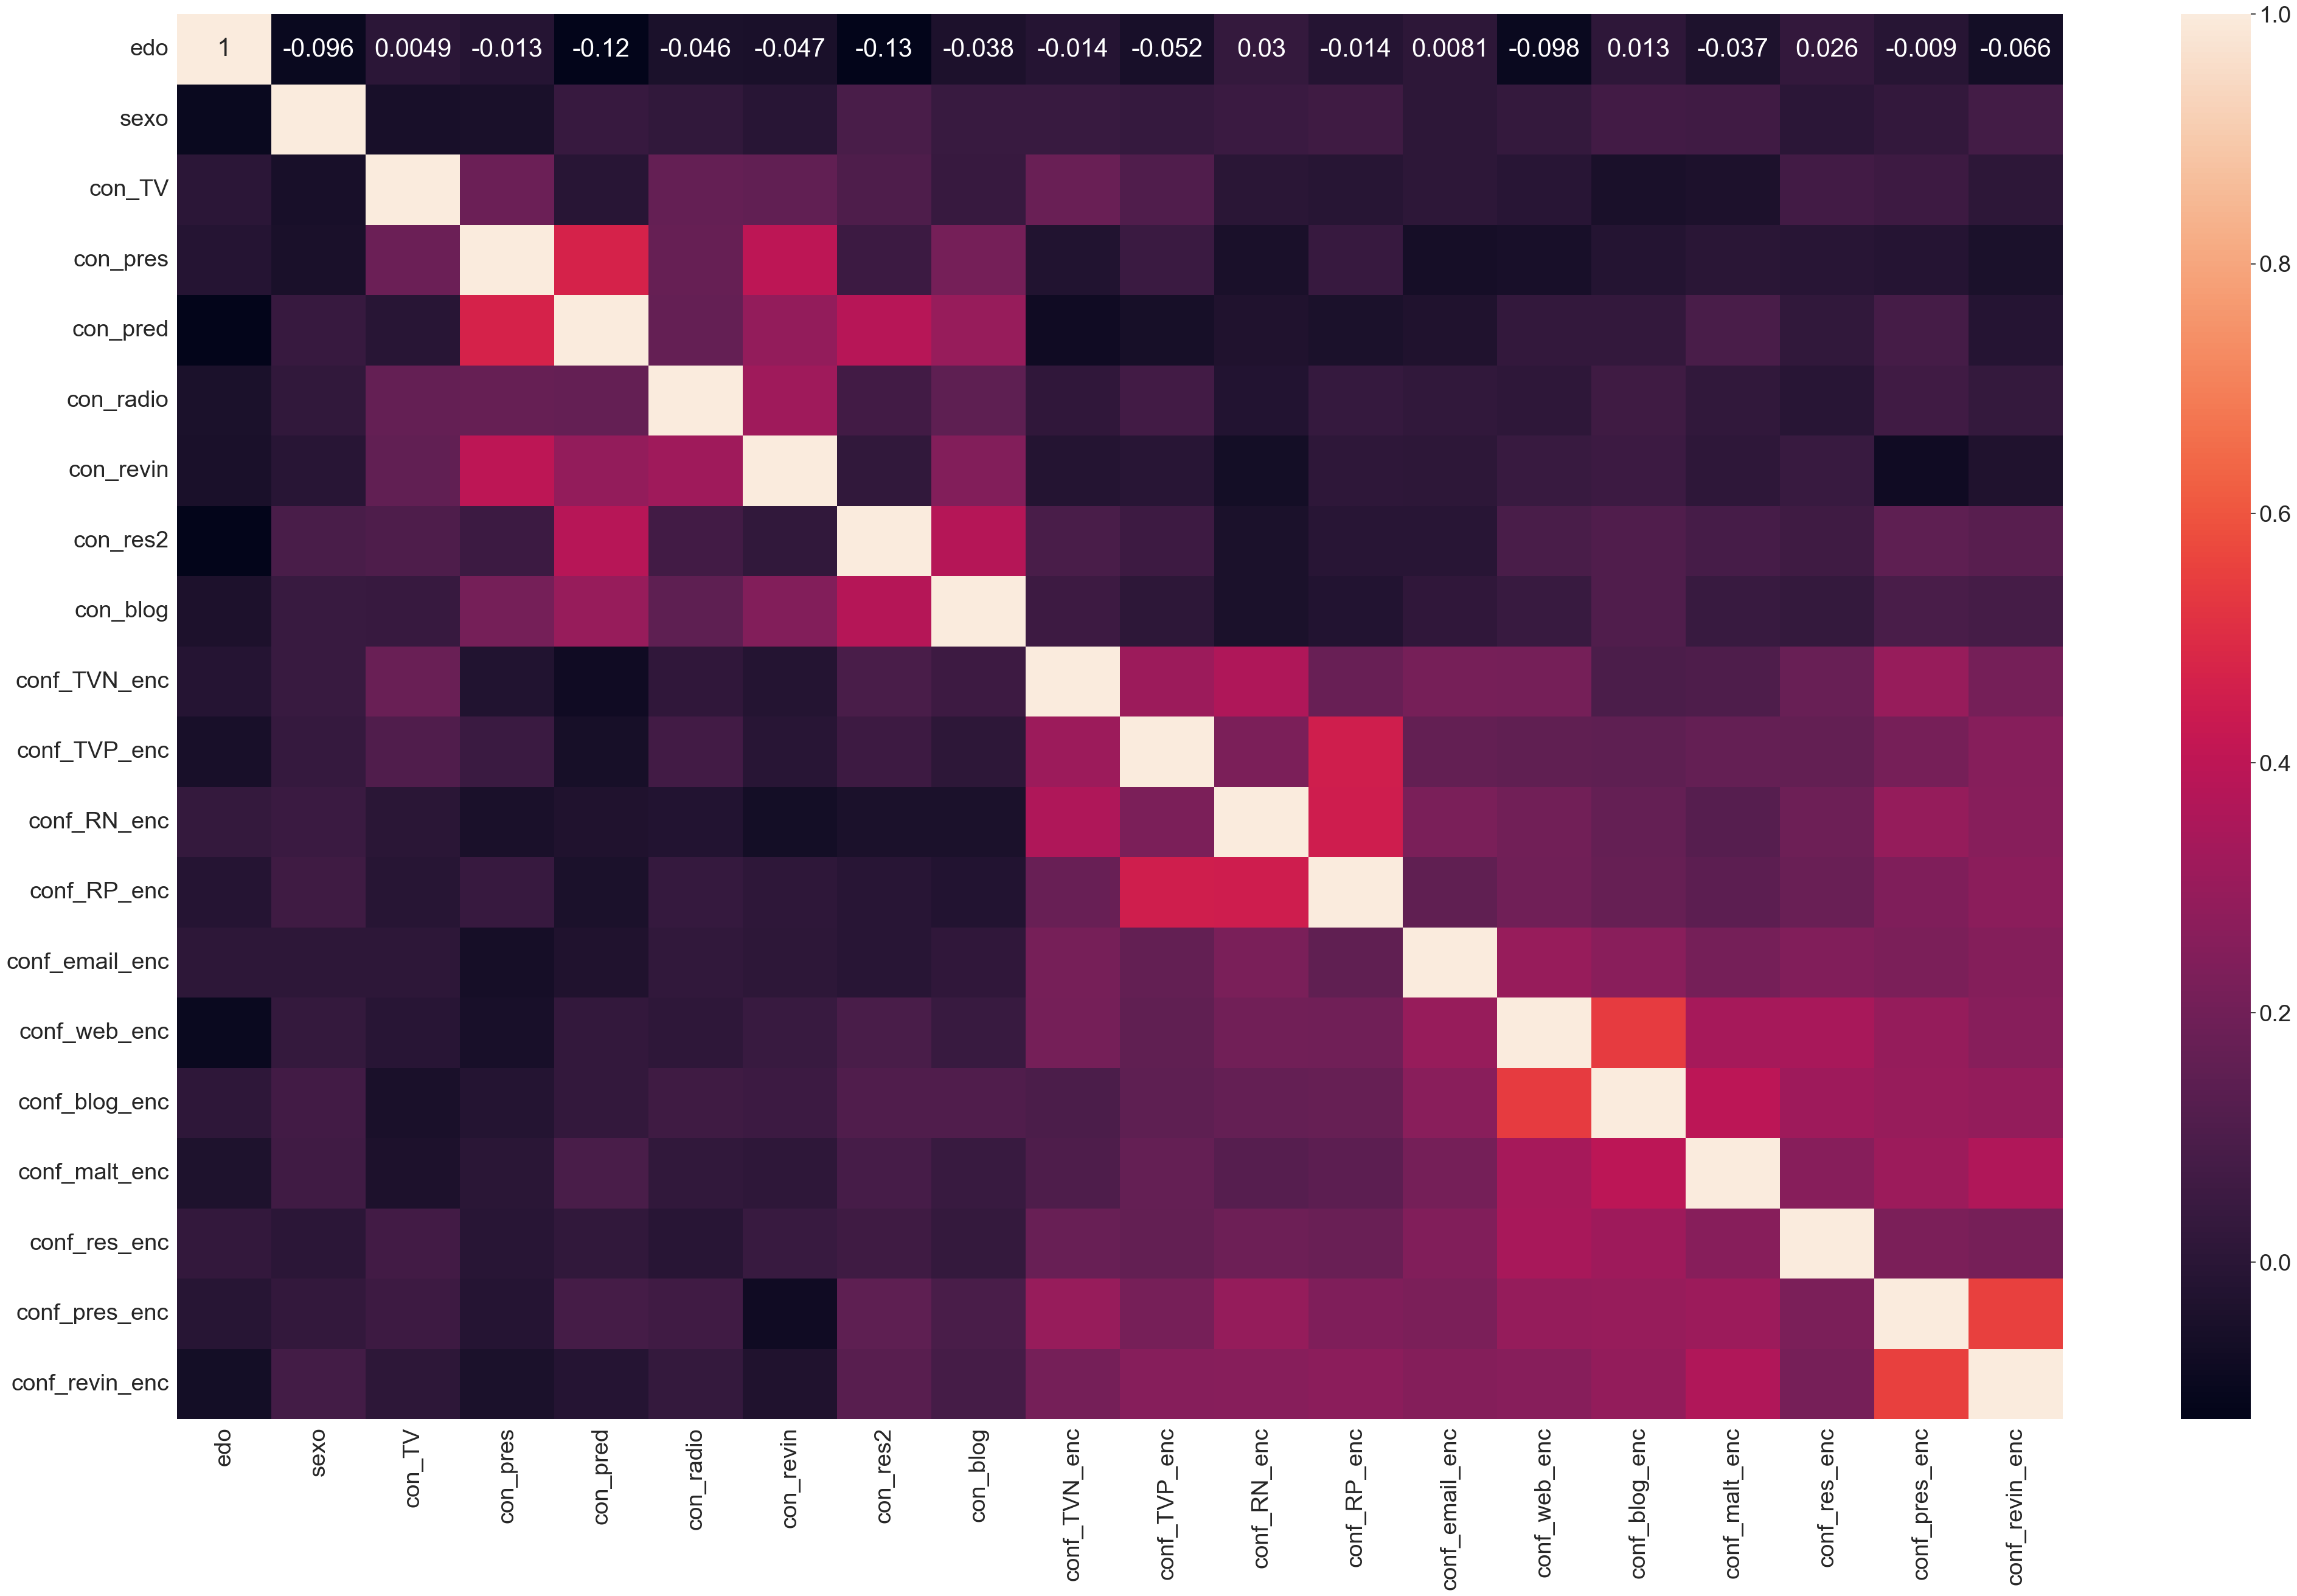

In [88]:
plt.figure(figsize=(50,30))
sns.set(font_scale = 2.5)
sns.heatmap(df_final.corr(method='spearman'), annot = True);
save_path = os.path.join(parent_directory, 'results', 'corr_spearman.png')
plt.savefig(save_path)

In this correlation graph we can see that the demographic variables do not have an explanatory impact for any of the media consumption and trust variables. This allows us to discard them from our analysis.

However, this implies that consumption and trust behavior is generally the same, regardless of gender and state of residence.

# Consumption and Confidence Dataframe

In [60]:
df_con_conf = pd.concat([df_consumo, df_conf_nom ], axis=1)

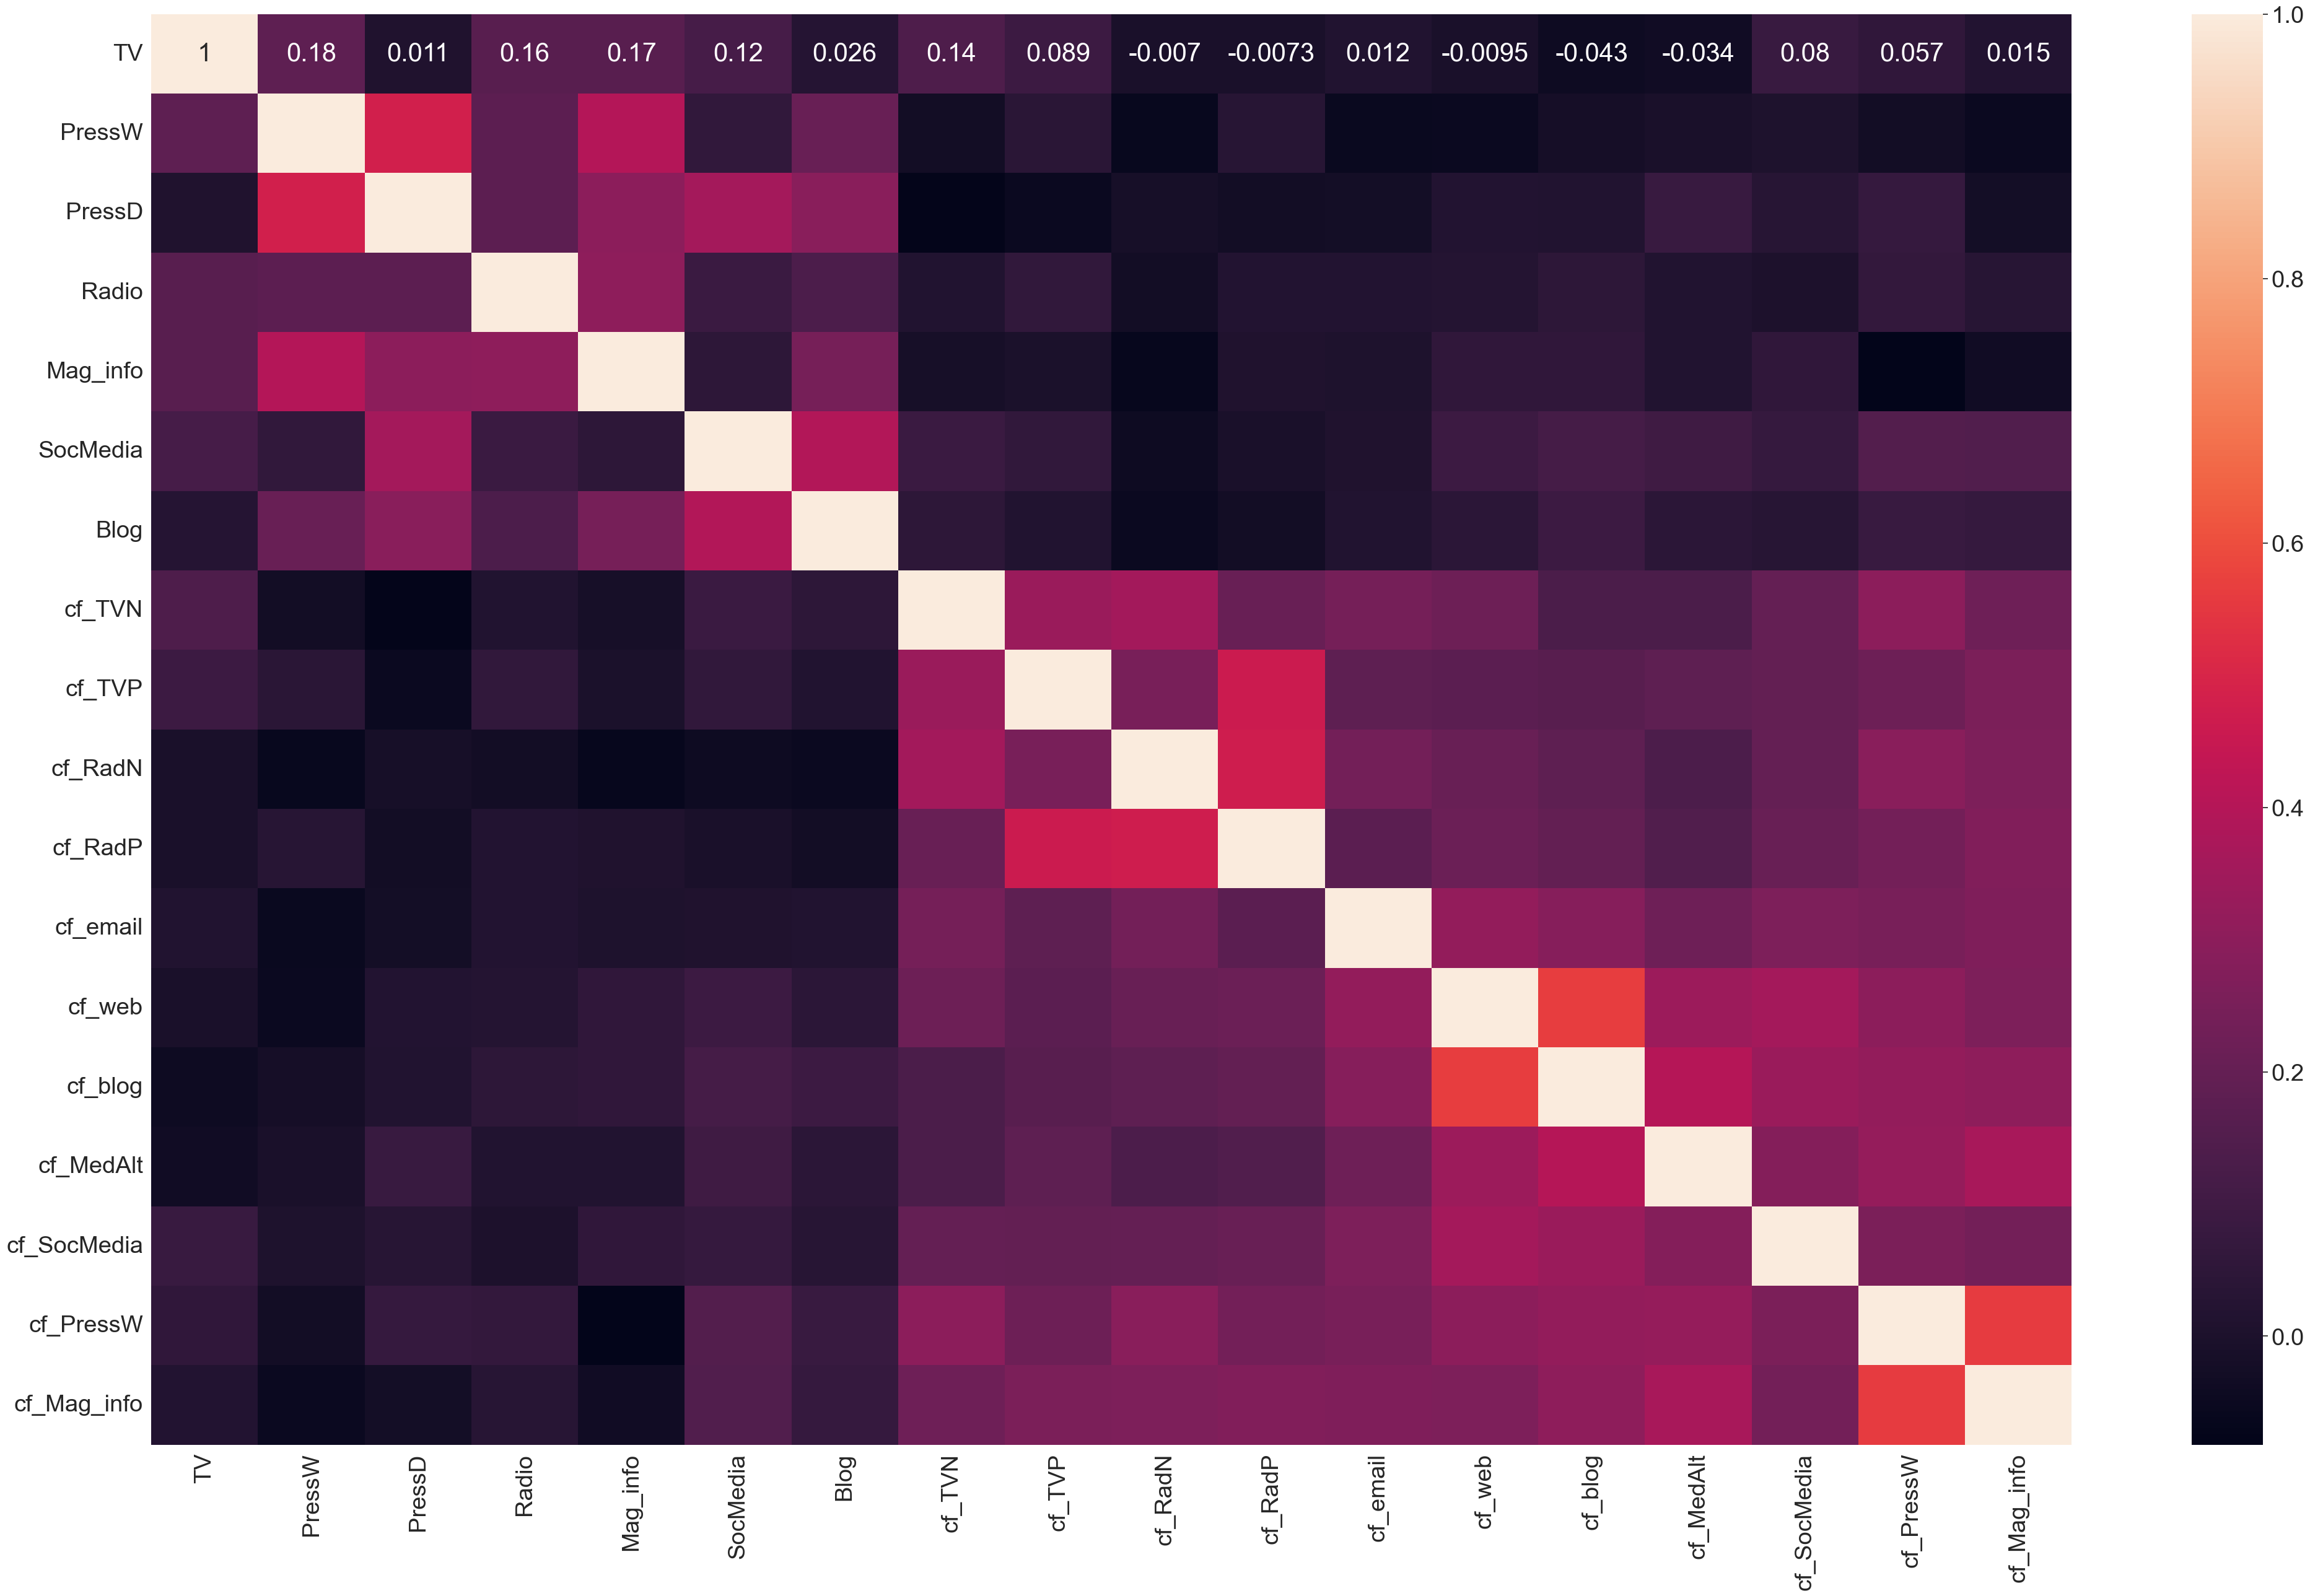

In [87]:
plt.figure(figsize=(50,30))
sns.set(font_scale = 2.5)
sns.heatmap(df_con_conf.corr(), annot = True)
save_path = os.path.join(parent_directory, 'results', 'corr_variables.png')
plt.savefig(save_path)

In [62]:
df_consumo.columns

Index(['con_TV', 'con_pres', 'con_pred', 'con_radio', 'con_revin', 'con_res2',
       'con_blog'],
      dtype='object')

# Data Analysis

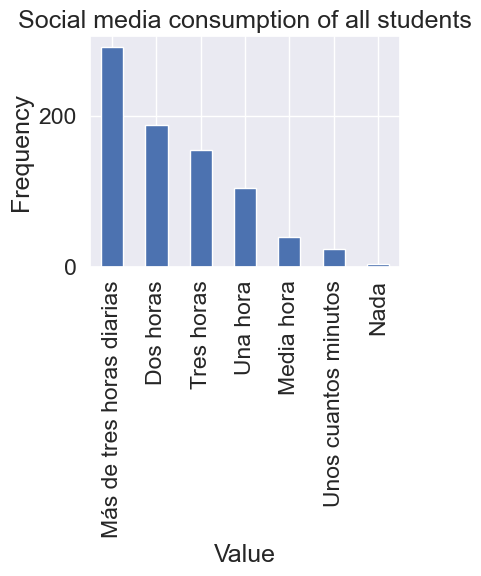

In [63]:
hrs_redes_plot

In [64]:
#cambiamos nombres de columnas para mejor manipulación de datos
#primero creamos dos listas para crear un diccionario
keys=['con_TV', 'con_pres', 'con_pred', 'con_radio', 'con_revin',
       'con_res2', 'con_blog', 'conf_TVN_enc', 'conf_TVP_enc', 'conf_RN_enc',
       'conf_RP_enc', 'conf_email_enc', 'conf_web_enc', 'conf_blog_enc',
       'conf_malt_enc', 'conf_res_enc', 'conf_pres_enc', 'conf_revin_enc']
values=['TV', 'PressW', 'PressD', 'Radio', 'Mag_info',
       'SocMedia', 'Blog', 'cf_TVN', 'cf_TVP', 'cf_RadN',
       'cf_RadP', 'cf_email', 'cf_web', 'cf_blog',
       'cf_MedAlt', 'cf_SocMedia', 'cf_PressW', 'cf_Mag_info']

zip_iterator = zip(keys, values)

df_con_conf.rename(columns=dict(zip_iterator), inplace=True)

In [65]:
df_con_conf.describe()

,TV,PressW,PressD,Radio,Mag_info,SocMedia,Blog,cf_TVN,cf_TVP,cf_RadN,cf_RadP,cf_email,cf_web,cf_blog,cf_MedAlt,cf_SocMedia,cf_PressW,cf_Mag_info
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,1.329602,1.339552,2.446517,1.313433,1.364428,3.231343,2.046020,0.652985,0.686567,0.855721,0.812189,0.601990,0.764925,0.654229,0.889303,0.624378,0.853234,0.866915
std,0.964924,0.897140,1.050826,0.954125,1.000761,0.931643,1.126659,0.711218,0.769123,0.698035,0.749130,0.802112,0.771997,0.822985,0.831470,0.797382,0.651353,0.609963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [66]:
frecuencias = df_con_conf.apply(pd.Series.value_counts)
#frecuencias.to_excel('frecuencias.xlsx')
frecuencias

,TV,PressW,PressD,Radio,Mag_info,SocMedia,Blog,cf_TVN,cf_TVP,cf_RadN,cf_RadP,cf_email,cf_web,cf_blog,cf_MedAlt,cf_SocMedia,cf_PressW,cf_Mag_info
0.0,150,141,33,166,168,4,73,391.0,403.0,262.0,315.0,482.0,356.0,459.0,327.0,463.0,238.0,210.0
1.0,353,328,110,317,301,38,177,301.0,250.0,396.0,325.0,160.0,281.0,164.0,239.0,180.0,446.0,491.0
2.0,208,269,261,240,224,139,290,112.0,151.0,146.0,164.0,162.0,167.0,181.0,238.0,161.0,120.0,103.0
3.0,72,53,265,65,96,210,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,21,13,135,16,15,413,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
frecuencias_consumo = df_consumo.apply(pd.Series.value_counts)
frecuencias_consumo

,con_TV,con_pres,con_pred,con_radio,con_revin,con_res2,con_blog
0.0,150,141,33,166,168,4,73
1.0,353,328,110,317,301,38,177
2.0,208,269,261,240,224,139,290
3.0,72,53,265,65,96,210,168
4.0,21,13,135,16,15,413,96


In [68]:
frecuencias_consumo.columns

Index(['con_TV', 'con_pres', 'con_pred', 'con_radio', 'con_revin', 'con_res2',
       'con_blog'],
      dtype='object')

In [69]:
keys = ['con_TV', 'con_pres', 'con_pred', 'con_radio', 
        'con_revin', 'con_res2', 'con_blog']

values=['TV', 'Prensa Escrita', 'Prensa Digital', 'Radio', 'Revistas', 'Redes Sociales', 'Blogs']

zip_iterator = zip(keys, values)

frecuencias_consumo.rename(columns=dict(zip_iterator), inplace=True)

In [70]:
frecuencias_conf = df_conf_nom.apply(pd.Series.value_counts)
frecuencias_conf

,conf_TVN_enc,conf_TVP_enc,conf_RN_enc,conf_RP_enc,conf_email_enc,conf_web_enc,conf_blog_enc,conf_malt_enc,conf_res_enc,conf_pres_enc,conf_revin_enc
0,391,403,262,315,482,356,459,327,463,238,210
1,301,250,396,325,160,281,164,239,180,446,491
2,112,151,146,164,162,167,181,238,161,120,103


In [71]:
frecuencias_conf.columns

Index(['conf_TVN_enc', 'conf_TVP_enc', 'conf_RN_enc', 'conf_RP_enc',
       'conf_email_enc', 'conf_web_enc', 'conf_blog_enc', 'conf_malt_enc',
       'conf_res_enc', 'conf_pres_enc', 'conf_revin_enc'],
      dtype='object')

In [72]:
keys = ['conf_TVN_enc', 'conf_TVP_enc', 'conf_RN_enc', 'conf_RP_enc', 'conf_email_enc', 'conf_web_enc', 'conf_blog_enc', 'conf_malt_enc', 'conf_res_enc', 'conf_pres_enc', 'conf_revin_enc']

values=['TV News', 'TV Prog', 'Radio News', 'Radio Programas', 'Email', 'Web', 'Blog', 'Medios Alternativos', 'Redes Sociales', 'Prensa', 'Revistas']

zip_iterator = zip(keys, values)

frecuencias_conf.rename(columns=dict(zip_iterator), inplace=True)

### Frequencies

C:\Users\monts\AppData\Local\Temp\ipykernel_35236\767107901.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom[j] - frecuencias_consumo.iloc[i, j] / 2),
C:\Users\monts\AppData\Local\Temp\ipykernel_35236\767107901.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom[j] - frecuencias_consumo.iloc[i, j] / 2),
C:\Users\monts\AppData\Local\Temp\ipykernel_35236\767107901.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

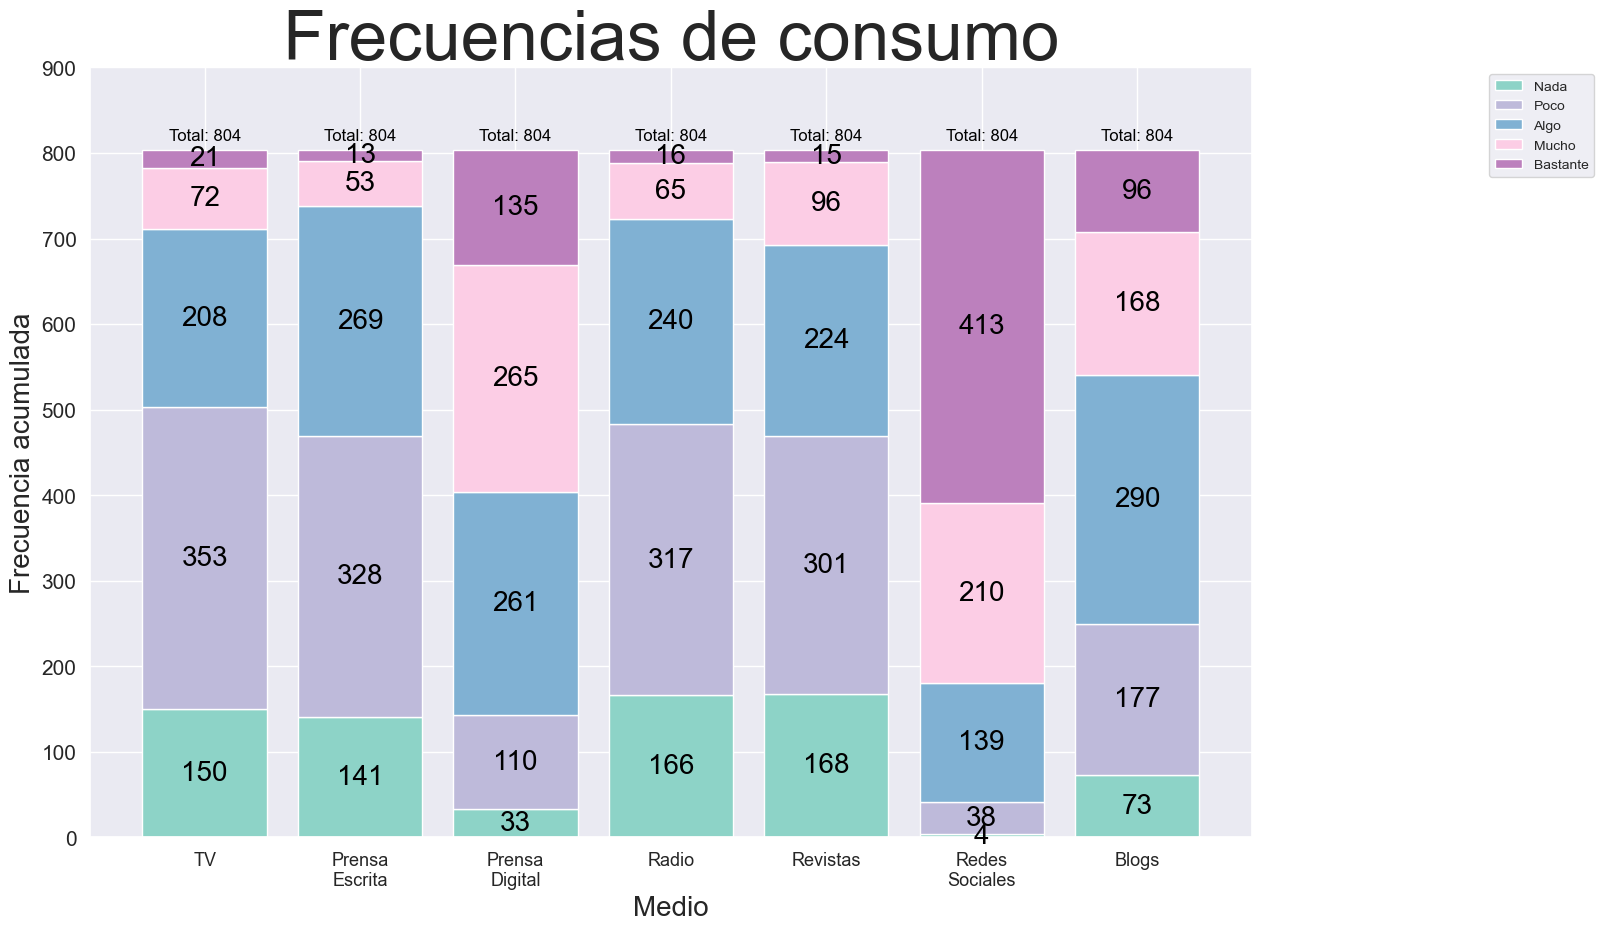

In [89]:

# Define colores personalizados para los valores de la escala Likert o nominal
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(15, 10))

bottom = None
legends = []
for i, fila in enumerate(frecuencias_consumo.index):
    color = plt.cm.Set3(i/len(frecuencias_consumo.index))
    bars = ax.bar(
        x=frecuencias_consumo.columns,
        height=frecuencias_consumo.loc[fila],
        bottom=bottom,
        color=color
    )
    bottom = frecuencias_consumo.loc[fila] if bottom is None else bottom + frecuencias_consumo.loc[fila]
    legends.append(bars[0])

# Agregar las frecuencias en cada sección de la barra
    for j, bar in enumerate(bars):
        ax.annotate(str(frecuencias_consumo.iloc[i, j]), xy=(bar.get_x() + bar.get_width() / 2, 
                                                             bottom[j] - frecuencias_consumo.iloc[i, j] / 2), 
                    ha='center', va='center', color='black', fontsize=20)

# Agregar el total en la cima de cada barra
for j, columna in enumerate(frecuencias_consumo.columns):
    total = frecuencias_consumo[columna].sum()
    ax.annotate(f'Total: {total}', xy=(j, bottom[j]), xytext=(0, 5), textcoords='offset points', 
                ha='center', va='bottom', color='black', fontsize=12)
    
# Agregar la leyenda
labels = ["Nada", "Poco", "Algo", "Mucho", "Bastante"]
plt.legend(legends, labels, loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=10)

# Dividir etiquetas del eje x en dos líneas
etiquetas_x = [label.replace(' ', '\n') for label in frecuencias_consumo.columns]


# Personalizar el gráfico
plt.title('Frecuencias de consumo', fontsize=50)
plt.xlabel('Medio', fontsize=20)
plt.ylabel('Frecuencia acumulada', fontsize=20)
plt.xticks(range(len(etiquetas_x)), etiquetas_x, rotation=0, ha='center', fontsize=13)
plt.yticks(np.arange(0, 901, 100), fontsize=15)
save_path = os.path.join(parent_directory, 'results', 'consumption.png')
plt.savefig(save_path)
plt.show()

C:\Users\monts\AppData\Local\Temp\ipykernel_35236\822623064.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(str(frecuencias_conf.iloc[i, j]), xy=(bar.get_x() + bar.get_width() / 2, bottom[j] - frecuencias_conf.iloc[i, j] / 2), ha='center', va='center', color='black', fontsize=15)
C:\Users\monts\AppData\Local\Temp\ipykernel_35236\822623064.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(str(frecuencias_conf.iloc[i, j]), xy=(bar.get_x() + bar.get_width() / 2, bottom[j] - frecuencias_conf.iloc[i, j] / 2), ha='center', va='center', color='black', fontsize=15)
C:\Users\monts\AppData\Local

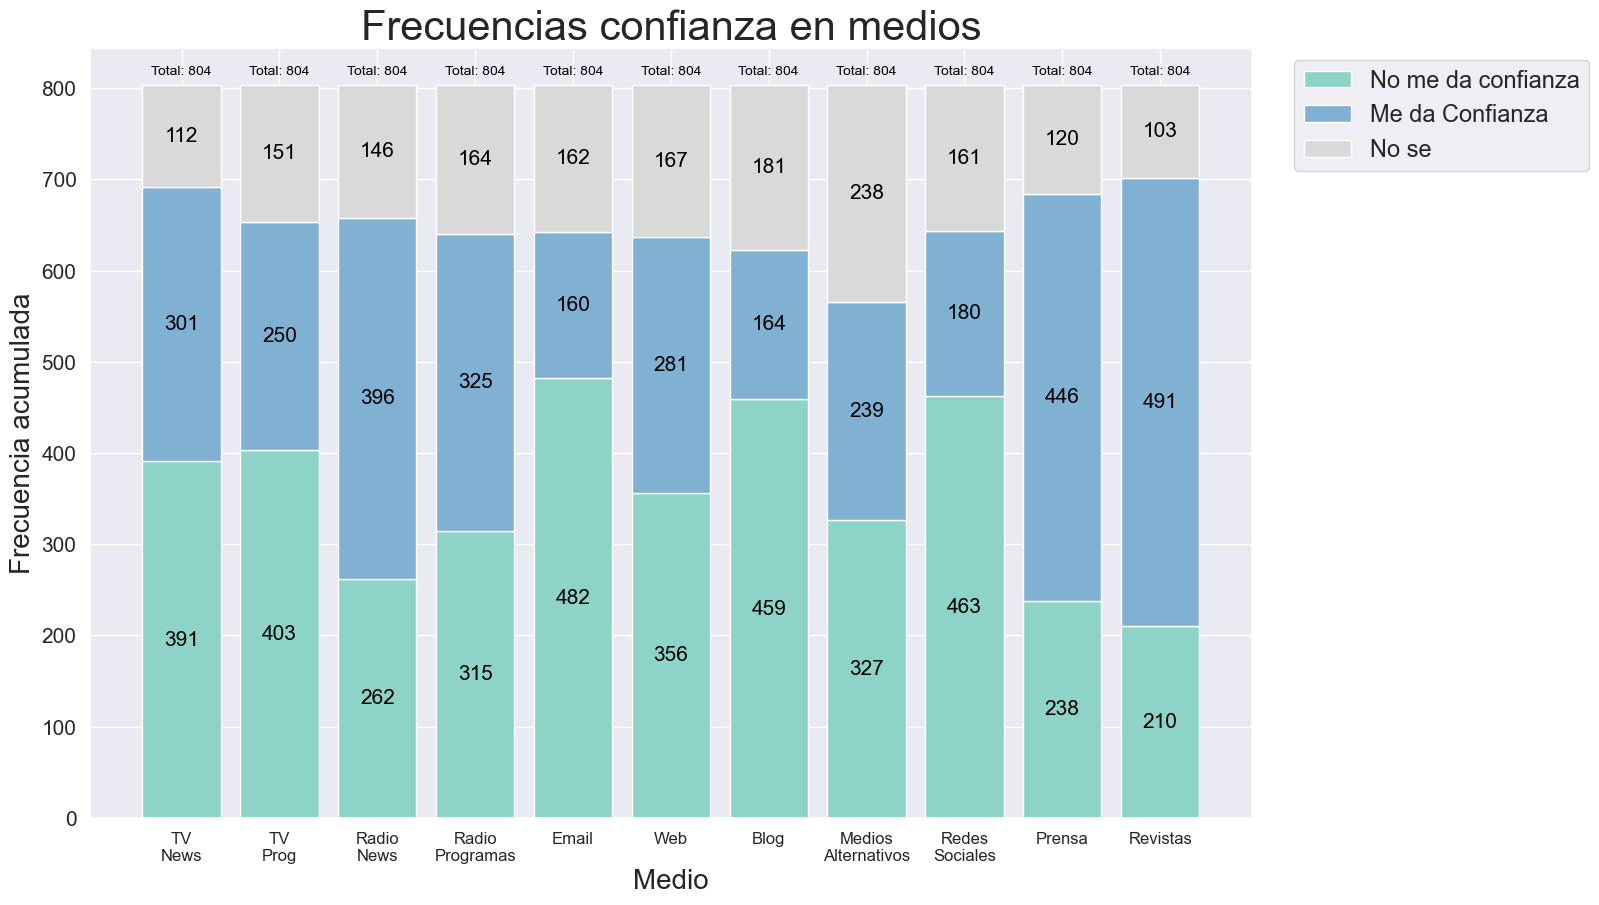

In [90]:

# Define colores personalizados para los valores de la escala Likert o nominal
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(15, 10))

bottom = None
legends = []
for i, fila in enumerate(frecuencias_conf.index):
    color = plt.cm.Set3(i/len(frecuencias_conf.index))
    bars = ax.bar(
        x=frecuencias_conf.columns,
        height=frecuencias_conf.loc[fila],
        bottom=bottom,
        color=color
    )
    bottom = frecuencias_conf.loc[fila] if bottom is None else bottom + frecuencias_conf.loc[fila]
    legends.append(bars[0])
    
# Agregar las frecuencias en cada sección de la barra
    for j, bar in enumerate(bars):
        ax.annotate(str(frecuencias_conf.iloc[i, j]), xy=(bar.get_x() + bar.get_width() / 2, bottom[j] - frecuencias_conf.iloc[i, j] / 2), ha='center', va='center', color='black', fontsize=15)

# Agregar el total en la cima de cada barra
for j, columna in enumerate(frecuencias_conf.columns):
    total = frecuencias_conf[columna].sum()
    ax.annotate(f'Total: {total}', xy=(j, bottom[j]), 
                xytext=(0, 5), textcoords='offset points', 
                ha='center', va='bottom', color='black', 
                fontsize=10)
    

# Agregar la leyenda
labels = ['No me da confianza', 'Me da Confianza', 'No se']
plt.legend(legends, labels, loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=17)

# Dividir etiquetas del eje x en dos líneas
etiquetas_x = [label.replace(' ', '\n') for label in frecuencias_conf.columns]

# Personalizar el gráfico
plt.title('Frecuencias confianza en medios', fontsize=30)
plt.xlabel('Medio', fontsize=20)
plt.ylabel('Frecuencia acumulada', fontsize=20)
plt.xticks(range(len(etiquetas_x)), etiquetas_x, rotation=0, ha='center', fontsize=12)
plt.yticks(np.arange(0, 820, 100), fontsize=15)

save_path = os.path.join(parent_directory, 'results', 'trust.png')
plt.savefig(save_path)

plt.show()

In [75]:
total_filas = len(df_con_conf)
frecuencias_porcentuales = frecuencias / total_filas * 100
frecuencias_porcentuales.to_excel('frecuencias_porcentuales.xlsx')
frecuencias_porcentuales

,TV,PressW,PressD,Radio,Mag_info,SocMedia,Blog,cf_TVN,cf_TVP,cf_RadN,cf_RadP,cf_email,cf_web,cf_blog,cf_MedAlt,cf_SocMedia,cf_PressW,cf_Mag_info
0.0,18.656716,17.537313,4.104478,20.646766,20.895522,0.497512,9.079602,48.631841,50.124378,32.587065,39.179104,59.950249,44.278607,57.089552,40.671642,57.587065,29.601990,26.119403
1.0,43.905473,40.796020,13.681592,39.427861,37.437811,4.726368,22.014925,37.437811,31.094527,49.253731,40.422886,19.900498,34.950249,20.398010,29.726368,22.388060,55.472637,61.069652
2.0,25.870647,33.457711,32.462687,29.850746,27.860697,17.288557,36.069652,13.930348,18.781095,18.159204,20.398010,20.149254,20.771144,22.512438,29.601990,20.024876,14.925373,12.810945
3.0,8.955224,6.592040,32.960199,8.084577,11.940299,26.119403,20.895522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,2.611940,1.616915,16.791045,1.990050,1.865672,51.368159,11.940299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# U de Mann Whitney Test

To carry out the hypothesis test on the relationship between the variables consumption and trust in the media, it was first necessary to confirm the type of distribution of the data. To do so, the **Kolmogorov-Smirnov test** was performed.

$H_{0}$. The sample follows a normal distribution;

$H_{1}$. The sample follows an eigendistribution.

According to the results of the normality test, the result of the statistic is equal to 0.916 and the corresponding p-value is 0.0. Since the p-value is less than 0.05, it is possible to reject the null hypothesis; that is, we have sufficient evidence to state that the sample data do not come from a normal distribution.

In [76]:
df_test=pd.DataFrame(data=df_con_conf, columns=['SocMedia', 'cf_SocMedia'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SocMedia     804 non-null    float64
 1   cf_SocMedia  804 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 12.7 KB


In [77]:
df_test.cf_SocMedia.value_counts()

cf_SocMedia
0    463
1    180
2    161
Name: count, dtype: int64

In [78]:
df_test = df_test[df_test.cf_SocMedia !=2]
df_test.cf_SocMedia.value_counts()

cf_SocMedia
0    463
1    180
Name: count, dtype: int64

c:\Users\monts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


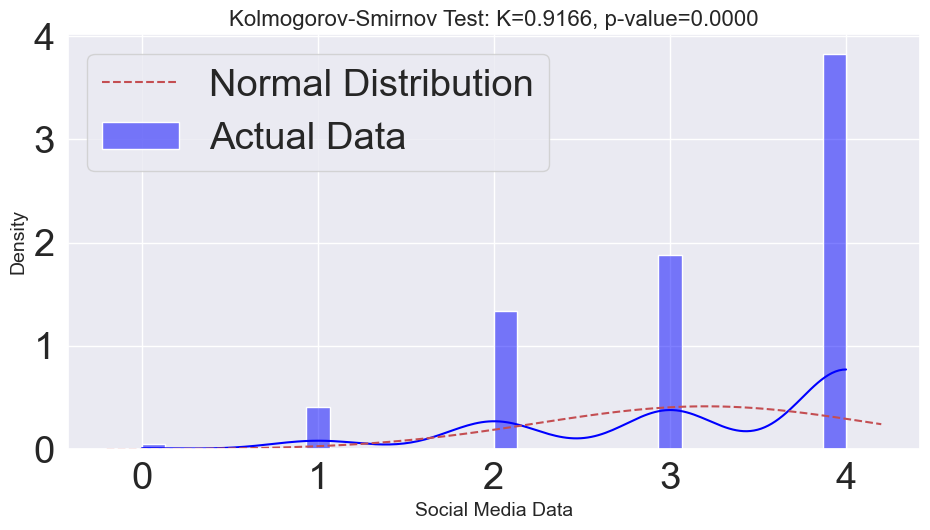

In [91]:
kst_statistic, kst_pvalue = stats.kstest(df_test.SocMedia, 'norm')

# Plot the data distribution vs. normal distribution
plt.figure(figsize=(10, 6))

# Histogram of actual data
sns.histplot(df_test.SocMedia, kde=True, color='blue', stat='density', label='Actual Data', bins=30)

# Overlay the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
normal_pdf = stats.norm.pdf(x, np.mean(df_test.SocMedia), np.std(df_test.SocMedia))
plt.plot(x, normal_pdf, 'r--', label='Normal Distribution')

# Title and labels
plt.title(f'Kolmogorov-Smirnov Test: K={kst_statistic:.4f}, p-value={kst_pvalue:.4f}', fontsize=16)
plt.xlabel('Social Media Data', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

plt.tight_layout()

save_path = os.path.join(parent_directory, 'results', 'Kolmogorov-SmirnovTest.png')
plt.savefig(save_path)

plt.show()

Once it has been confirmed that our data **do not follow a normal distribution**, it is possible to formulate the hypothesis that allows us to understand the type of relationship between the variables of consumption and trust in the media. The statistic used was non-parametric, in this case, the Mann-Whitney U test. The approach is as follows:

$H_{0}$. The degree of confidence is not related to the level of media consumption; that is, the variables are independent;

$H_{1}$. The degree of confidence is related to the level of media consumption; that is, the variables have a certain degree of dependence.

c:\Users\monts\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
c:\Users\monts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\monts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


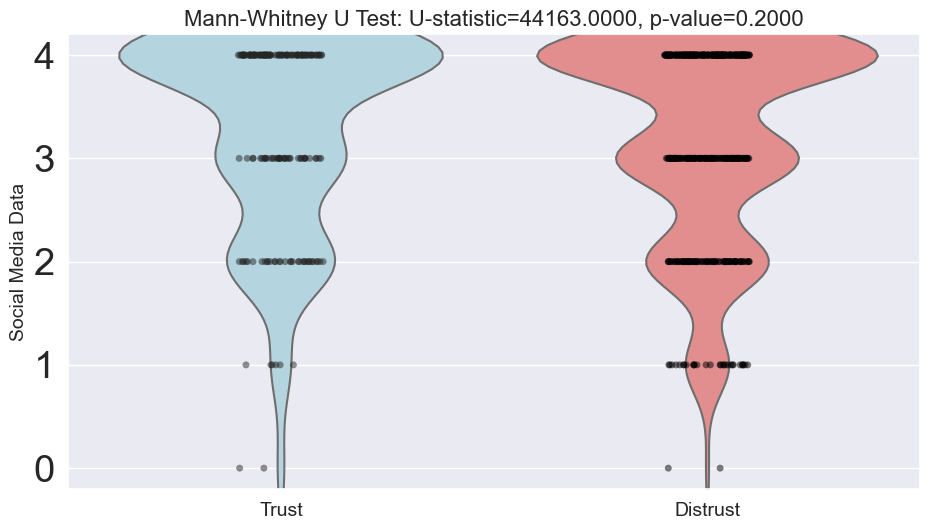

In [92]:
# Split data into two groups: Trust and Distrust
df_desconfianza = df_test[df_test.cf_SocMedia == 0]
list_desconfianza = df_desconfianza.SocMedia.tolist()

df_confianza = df_test[df_test.cf_SocMedia == 1]
list_confianza = df_confianza.SocMedia.tolist()

# Perform Mann-Whitney U test
mannwhitney_stat, mannwhitney_pvalue = stats.mannwhitneyu(list_confianza, list_desconfianza, use_continuity=True, alternative='two-sided')

plt.figure(figsize=(10, 6))

sns.violinplot(data=[list_confianza, list_desconfianza], inner=None, palette=["lightblue", "lightcoral"])

# Overlay with strip plot (show individual points)
sns.stripplot(data=[list_confianza, list_desconfianza], jitter=True, color='black', alpha=0.5)

# Title with U-statistic and p-value
plt.title(f'Mann-Whitney U Test: U-statistic={mannwhitney_stat:.4f}, p-value={mannwhitney_pvalue:.4f}', fontsize=16)
plt.xticks([0, 1], ['Trust', 'Distrust'], fontsize=14)
plt.ylabel('Social Media Data', fontsize=14)

plt.tight_layout()
save_path = os.path.join(parent_directory, 'results', 'UTest.png')
plt.savefig(save_path)
plt.show()

Given that the p-value is greater than 0.05, **it is possible to accept the null hypothesis**, which states that the degree of trust is not related to the level of media consumption; that is, the variables are independent.

## Conclusion

The results of the survey made it possible to anticipate the possible relationship between trust and media consumption. It was observed that, in the case of television, use was minimal and, at the same time, there was a certain degree of distrust. It was also observed that radio or the press showed a higher degree of trust; however, use was not higher but, on the contrary, lower. Likewise, the phenomenon also presented changes in reference to social networks, since despite the clear distrust, these are the media most consumed by Mexican youth.

The results of the U-test provide further statistical evidence to support the idea that in these times of digital boom, young natives of the digital world do not consider trust as a factor that determines their consumption decisions. In other words, their predominant consumption of social networks as a means of political information is not due to trust in that medium, but possibly to a question of easy access to information.

### References

* Analytics Vidhya. (2017, November 6). A Comprehensive Guide to Conduct Analysis Using Non-parametric Tests. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2017/11/a-guide-to-conduct-analysis-using-non-parametric-tests/


* Gainous, J., Abbott, J., & Wagner, K. (2019). Traditional versus internet media in a restricted information environment: How trust in the medium matters. Political Behavior, 41, 401-422.


* Gohil, S. (2019, septiembre 23). Guide to Encoding Categorical Features using Scikit-Learn for Machine Learning. Towards Data Science. Recuperado de https://towardsdatascience.com/guide-to-encoding-categorical-features-using-scikit-learn-for-machine-learning-5048997a5c79


* Scikit-learn. (2021). OrdinalEncoder. Recuperado el 19 de marzo de 2023, de https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html


* Towards Data Science. (2019, March 29). A Common Mistake to Avoid When Encoding Ordinal Features. Medium. https://towardsdatascience.com/a-common-mistake-to-avoid-when-encoding-ordinal-features-79e402796ab4